In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\hp\\Music\\DL'

In [4]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
277,278,320,101,2,2.5,3.0,8.62,0,0.70
472,473,327,116,4,4.0,4.5,9.48,1,0.90
99,100,323,113,3,4.0,4.0,8.88,1,0.79
140,141,329,110,2,4.0,3.0,9.15,1,0.84
242,243,324,115,3,3.5,3.0,8.76,1,0.70


In [5]:
df.shape

(500, 9)

In [6]:
# check for nan values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(columns=['Serial No.'], inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
x= df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [16]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1
...,...,...,...,...,...,...,...
11,327,111,4,4.0,4.5,9.00,1
192,322,114,5,4.5,4.0,8.94,1
92,298,98,2,4.0,3.0,8.03,0
221,316,110,3,3.5,4.0,8.56,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled= scaler.transform(X_test)

In [18]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [33]:
model = keras.Sequential()

model.add(Dense(7, input_dim=7, activation='relu'))

model.add(Dense(1, activation='linear'))


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='mean_absolute_error',optimizer='adam')

In [40]:
history = model.fit(x_train_scaled,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 0s 15ms/step - loss: 0.1111 - val_loss: 0.0983
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1022 - val_loss: 0.0915
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0960 - val_loss: 0.0868
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 0.0827
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 0.0791
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0833 - val_loss: 0.0753
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0797 - val_loss: 0.0716
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0763 - val_loss: 0.0683
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0733 - val_loss: 0.0656
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0711 - val_loss: 0.0634


In [41]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6219691047227576

To improve R2_score, increase epochs from 10 to 100 and add one more Hidden layer.

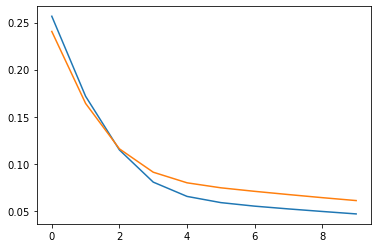

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])